In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from itertools import combinations
from statsmodels.tsa.stattools import adfuller

In [170]:
minimumAdv = 10

In [171]:
tpxData = pd.read_csv('TPX_prices.csv', index_col=0, parse_dates=True)
# tpxData

In [172]:
tpxData = tpxData.dropna(axis='columns')
# tpxData

In [173]:
tpxUniverseData = pd.read_excel('TPX Universe.xlsx')
# tpxUniverseData

In [174]:
tpxUniverseData[tpxUniverseData['Ticker'] == "1514 JP Equity"]['Avg of Daily Equity Traded Val over 3 Months'].values[0]

75.8224382316

In [175]:
tickersName = tpxData.columns

In [176]:
for tickers in tickersName:
    if (tpxUniverseData.loc[tpxUniverseData['Ticker'] == tickers]['Avg of Daily Equity Traded Val over 3 Months'] < minimumAdv).bool():
        tpxData = tpxData.drop([tickers], axis=1)

/var/folders/b1/x4vbkfvn2qlf297m4zgbkw5h0000gn/T/ipykernel_3048/4153440384.py:2: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  if (tpxUniverseData.loc[tpxUniverseData['Ticker'] == tickers]['Avg of Daily Equity Traded Val over 3 Months'] < minimumAdv).bool():
/var/folders/b1/x4vbkfvn2qlf297m4zgbkw5h0000gn/T/ipykernel_3048/4153440384.py:2: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  if (tpxUniverseData.loc[tpxUniverseData['Ticker'] == tickers]['Avg of Daily Equity Traded Val over 3 Months'] < minimumAdv).bool():
/var/folders/b1/x4vbkfvn2qlf297m4zgbkw5h0000gn/T/ipykernel_3048/4153440384.py:2: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  if (tpxUniverseData.loc[tpxUniverseData['Ticker'] == tickers]['Avg of Daily Equity Traded Val over 3 Months'] < minimumAdv).bool():
/var/folders/b1/x4vbkfvn2qlf297m4zgbkw5h0000gn/T/ipykernel_3048/4153440384.p

In [177]:
instrumentList = list(tpxData.columns)
pair_list = list(sorted(map(sorted, combinations(set(instrumentList), 2))))
len(pair_list)

63190

In [178]:
pair_list

[['1332 JP Equity', '1514 JP Equity'],
 ['1332 JP Equity', '1605 JP Equity'],
 ['1332 JP Equity', '1662 JP Equity'],
 ['1332 JP Equity', '1721 JP Equity'],
 ['1332 JP Equity', '1801 JP Equity'],
 ['1332 JP Equity', '1802 JP Equity'],
 ['1332 JP Equity', '1803 JP Equity'],
 ['1332 JP Equity', '1808 JP Equity'],
 ['1332 JP Equity', '1812 JP Equity'],
 ['1332 JP Equity', '1878 JP Equity'],
 ['1332 JP Equity', '1911 JP Equity'],
 ['1332 JP Equity', '1925 JP Equity'],
 ['1332 JP Equity', '1928 JP Equity'],
 ['1332 JP Equity', '1944 JP Equity'],
 ['1332 JP Equity', '1959 JP Equity'],
 ['1332 JP Equity', '1963 JP Equity'],
 ['1332 JP Equity', '1969 JP Equity'],
 ['1332 JP Equity', '2002 JP Equity'],
 ['1332 JP Equity', '2127 JP Equity'],
 ['1332 JP Equity', '2181 JP Equity'],
 ['1332 JP Equity', '2212 JP Equity'],
 ['1332 JP Equity', '2222 JP Equity'],
 ['1332 JP Equity', '2267 JP Equity'],
 ['1332 JP Equity', '2269 JP Equity'],
 ['1332 JP Equity', '2282 JP Equity'],
 ['1332 JP Equity', '2371

In [179]:
# (tpxData.pct_change()+1).cumprod().plot(figsize=(25, 20), legend=False)

# plt.ylabel("Percentage Change")
# plt.show()

In [180]:
def findHedgeRatio(x, y):
    """
    Calculates the hedge ratio between two variables.

    Parameters:
    x: panda dataframe timeseries for instrument A
    y: panda dataframe timeseries for instrument B

    Returns:
    float: The hedge ratio.

    """
    model = sm.OLS(x, sm.add_constant(y)).fit()
    return model.params

In [181]:
def ADFisStionaryTest(spread):
    """
    Augmented Dickey-Fuller test for stationarity.

    Parameters:
    spread: panda dataframe timeseries

    Returns:
    True if pair is stationary
    False if pair is not stationary
    """
    result = adfuller(spread, maxlag=1)
    # print('ADF Statistic: %f' % result[0])
    # print('p-value: %f' % result[1])
    # print('Critical Values:')
    # for key, value in result[4].items():
    #     print('\t%s: %.3f' % (key, value))
    if (result[0] < result[4]['1%']):
        return True
    else:
        return False

In [182]:
validPairsList = []

### Find valid pairs and its spread

In [ ]:
validPairs = pd.DataFrame()
for pair in pair_list:
    dfSpread = pd.DataFrame()
    hedgeRatioParams = findHedgeRatio(tpxData[pair[0]], tpxData[pair[1]])
    dfSpread['spread'] = tpxData[pair[0]] - hedgeRatioParams[1] * tpxData[pair[1]] - hedgeRatioParams[0]
    adfResult = ADFisStionaryTest(dfSpread.spread)
    if adfResult == True:
        validPairs[f'spread_{pair[0]}_{pair[1]}'] = dfSpread['spread']
        validPairsList.append(pair)
    # else:
        # print(f"{pair[0]} and {pair[1]} pair is not stationary")

In [184]:
valid = validPairs
# valid = pd.read_csv('validPairs3.csv', index_col=0, parse_dates=True)
valid

,spread_1332 JP Equity_1514 JP Equity,spread_1332 JP Equity_1802 JP Equity,spread_1332 JP Equity_1925 JP Equity,spread_1332 JP Equity_1959 JP Equity,spread_1332 JP Equity_3778 JP Equity,spread_1332 JP Equity_4578 JP Equity,spread_1514 JP Equity_1605 JP Equity,spread_1514 JP Equity_1662 JP Equity,spread_1514 JP Equity_1721 JP Equity,spread_1514 JP Equity_1801 JP Equity,...,spread_9602 JP Equity_9684 JP Equity,spread_9602 JP Equity_9719 JP Equity,spread_9603 JP Equity_9697 JP Equity,spread_9684 JP Equity_9843 JP Equity,spread_9684 JP Equity_9962 JP Equity,spread_9697 JP Equity_9983 JP Equity,spread_9719 JP Equity_9766 JP Equity,spread_9719 JP Equity_9861 JP Equity,spread_9735 JP Equity_9843 JP Equity,spread_9735 JP Equity_9861 JP Equity
Date,,,,,,,,,,,,,,,,,,,,,
1/1/2013,-308.074057,-34.790994,-1.166333,-68.340595,-269.518948,13.798589,-97.048839,-103.632830,89.376078,108.380669,...,-493.807673,-100.627553,-1732.572918,-211.251101,-672.039185,358.257603,-503.681068,-412.387571,-1704.203302,-2209.337779
2/1/2013,-308.074057,-34.790994,-1.166333,-68.340595,-269.518948,13.798589,-97.048839,-103.632830,89.376078,108.380669,...,-493.807673,-100.627553,-1732.572918,-211.251101,-672.039185,358.257603,-503.681068,-412.387571,-1704.203302,-2209.337779
3/1/2013,-308.074057,-34.790994,-1.166333,-68.340595,-269.518948,13.798589,-97.048839,-103.632830,89.376078,108.380669,...,-493.807673,-100.627553,-1732.572918,-211.251101,-672.039185,358.257603,-503.681068,-412.387571,-1704.203302,-2209.337779
4/1/2013,-303.533256,-35.114905,-11.786750,-64.173387,-264.975229,10.865337,-100.727097,-92.632573,89.134757,106.053942,...,-497.250505,-113.483180,-1774.573204,-220.504951,-697.413372,350.462463,-497.473525,-411.943293,-1690.481085,-2199.168069
7/1/2013,-309.288452,-36.931814,-9.996489,-66.132397,-268.225097,7.144132,-81.629274,-84.632687,106.479446,117.573194,...,-500.807673,-125.338808,-1722.073634,-214.002384,-674.171926,336.596029,-485.469770,-414.232449,-1671.295896,-2199.896534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27/5/2024,106.744011,-116.780522,165.521991,55.969263,-116.708442,66.838794,540.178316,538.347169,1075.626706,1018.361880,...,883.998290,-1235.719874,9.388677,-575.865600,47.940812,-219.717113,-1.567861,471.895552,940.257014,-143.850763
28/5/2024,90.467222,-138.198755,157.238535,-2.802389,-119.976533,58.138794,558.414844,559.346827,1110.868027,1036.939457,...,979.328596,-1118.387168,-13.314384,-611.225844,-187.393415,-258.814683,-58.011195,462.085307,929.321849,-127.733252
29/5/2024,86.535194,-143.048156,152.849947,-8.342439,-119.462513,44.853853,467.626153,461.346314,1039.833312,959.823942,...,925.018244,-1196.283337,-19.671283,-666.930931,-279.981335,-167.967049,-177.039264,443.985906,904.562654,-190.344206


In [185]:
# validPairs.to_csv("validPairs3.csv")

In [186]:
# valid[valid['Date'].str.contains("2021")]

### Strategy

Enter when price goes above 1 std.

Cut loss when price goes above 2 std.

Take profit when spread goes to 0 or change sign.


In [187]:
rollingWindow = 262
cutLossSd = 2

In [188]:
pairsOutcome = {}

In [189]:
# Slippage Cost 
def calculate_slippage_costs(pair1, pair2, volume, impact_factor):
    pair_1_adv = tpxUniverseData[tpxUniverseData['Ticker'] == pair1]['Avg of Daily Equity Traded Val over 3 Months'].values[0]
    pair_1_slippage_cost = estimate_slippage(volume / 2, pair_1_adv, impact_factor)
    # print(pair_1_slippage_cost)
    
    pair_2_adv = tpxUniverseData[tpxUniverseData['Ticker'] == pair2]['Avg of Daily Equity Traded Val over 3 Months'].values[0]
    pair_2_slippage_cost = estimate_slippage(volume / 2, pair_2_adv, impact_factor)
    # print(pair_2_slippage_cost)
    
    slippage_cost = (pair_1_slippage_cost + pair_2_slippage_cost)
    return slippage_cost

def estimate_slippage(volume, avg_daily_volume, impact_factor):
    """
    Estimate slippage using a volume-impact model.
    :param volume: Trade volume
    :param avg_daily_volume: Average daily volume
    :param impact_factor: Empirical factor (default is 0.5 for square root relationship)
    :return: Estimated slippage percentage
    """
    return impact_factor * ((volume / avg_daily_volume) ** 0.5)

In [190]:
for pair in validPairsList:
    df = pd.DataFrame()

    #Calculate Standard Deviations
    df['spread'] = valid[f'spread_{pair[0]}_{pair[1]}']
    df['mid'] =  df['spread'].rolling(rollingWindow).mean()
    df['1sd high'] = df['spread'].rolling(rollingWindow).mean() + df['spread'].rolling(rollingWindow).std()
    df['1sd low'] = df['spread'].rolling(rollingWindow).mean() - df['spread'].rolling(rollingWindow).std()
    df['2sd high'] = df['spread'].rolling(rollingWindow).mean() + df['spread'].rolling(rollingWindow).std() * cutLossSd
    df['2sd low'] = df['spread'].rolling(rollingWindow).mean() - df['spread'].rolling(rollingWindow).std() * cutLossSd
    df['position'] = 0

    return_df = (tpxData / tpxData.shift(1)) - 1

    df.loc[(df['spread'] > df['1sd high']) & (df['spread'] < df['2sd high']), 'position'] = -1
    df.loc[(df['spread'] < df['1sd low']) & (df['spread'] > df['2sd low']), 'position'] = 1
    df['position'] = df['position'].shift(1)

    df.loc[(df['position'] == 1) & (df['spread'] > df['mid']), 'position'] = 0
    df.loc[(df['position'] == -1) & (df['spread'] < df['mid']), 'position'] = 0

    #Calculate PnL
    df[f'{pair[0]} position'] = df['position']
    df[f'{pair[1]} position'] = df['position'] * -1
    df['dailypnl'] = df[f'{pair[1]} position']*return_df[f'{pair[1]}'].shift(-1) + df[f'{pair[0]} position']*return_df[f'{pair[0]}'].shift(-1)
    df['cumpnl'] = df['dailypnl'].cumsum()
    
    # Trading cost
    position_changed = df['position'].shift() != df['position']
    df['position_changed'] = position_changed
    volume = 1
    # commision per trade 
    commission_per_trade = 0.0005 * 2  # 0.05% commission per trade
    df['commission_cost'] = np.where(df['position_changed'],commission_per_trade * volume, 0)

    # bid_ask_spread
    bid_ask_spread = 0.0015 * 2 # 0.15% of the trade price
    df['bid_ask_spread_cost'] = np.where(df['position_changed'],bid_ask_spread * volume, 0)

    # slippage cost
    slippage_impact_factor = 0
    df['slippage_cost'] = np.where(df['position_changed'], calculate_slippage_costs(pair[0], pair[1], volume, slippage_impact_factor), 0)
    df['trading_cost'] = df['commission_cost'] + df['bid_ask_spread_cost'] + df['slippage_cost']
    
    df['dailypnl w/ trading cost'] = df['dailypnl'] - df['trading_cost']
    df['cumpnl w/ trading cost'] = df['dailypnl w/ trading cost'].cumsum()

    pairsOutcome[f'{pair[0]} {pair[1]}'] = df

In [191]:
# pairsOutcome['1332 JP Equity 1925 JP Equity'].loc[pairsOutcome['1332 JP Equity 1925 JP Equity']['position'] == 1]
pairsOutcome['4369 JP Equity 6845 JP Equity'].iloc[260:300]#.loc[pairsOutcome['4369 JP Equity 6845 JP Equity']['trading_cost'] != 0]

,spread,mid,1sd high,1sd low,2sd high,2sd low,position,4369 JP Equity position,6845 JP Equity position,dailypnl,cumpnl,position_changed,commission_cost,bid_ask_spread_cost,slippage_cost,trading_cost,dailypnl w/ trading cost,cumpnl w/ trading cost
Date,,,,,,,,,,,,,,,,,,
31/12/2013,-16.397198,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.0,0.000000,0.000000,False,0.000,0.000,0.0,0.000,0.000000,-0.004000
1/1/2014,-16.397198,134.213700,215.883973,52.543427,297.554247,-29.126846,0.0,0.0,-0.0,0.000000,0.000000,False,0.000,0.000,0.0,0.000,0.000000,-0.004000
2/1/2014,-16.397198,132.952021,214.384682,51.519359,295.817344,-29.913302,1.0,1.0,-1.0,0.000000,0.000000,True,0.001,0.003,0.0,0.004,-0.004000,-0.008000
3/1/2014,-16.397198,131.690342,212.865013,50.515670,294.039685,-30.659002,1.0,1.0,-1.0,-0.022350,-0.022350,False,0.000,0.000,0.0,0.000,-0.022350,-0.030350
6/1/2014,-26.404849,130.390465,211.358498,49.422432,292.326531,-31.545601,1.0,1.0,-1.0,0.102662,0.080311,False,0.000,0.000,0.0,0.000,0.102662,0.072311
7/1/2014,-19.935623,129.225380,210.151763,48.298996,291.078146,-32.627387,1.0,1.0,-1.0,0.011508,0.091819,False,0.000,0.000,0.0,0.000,0.011508,0.083819
8/1/2014,-50.104708,127.919132,208.967894,46.870370,290.016656,-34.178392,1.0,1.0,-1.0,-0.036702,0.055117,False,0.000,0.000,0.0,0.000,-0.036702,0.047117
9/1/2014,-57.435453,126.583701,207.793492,45.373910,289.003283,-35.835881,0.0,0.0,-0.0,0.000000,0.055117,True,0.001,0.003,0.0,0.004,-0.004000,0.043117
10/1/2014,-52.343161,125.302850,206.678632,43.927067,288.054415,-37.448716,0.0,0.0,-0.0,0.000000,0.055117,False,0.000,0.000,0.0,0.000,0.000000,0.043117


In [192]:
pairOne = 4369
pairTwo = 6845

Text(0.5, 1.0, '4369 JP Equity and 6845 JP Equity pair trade')

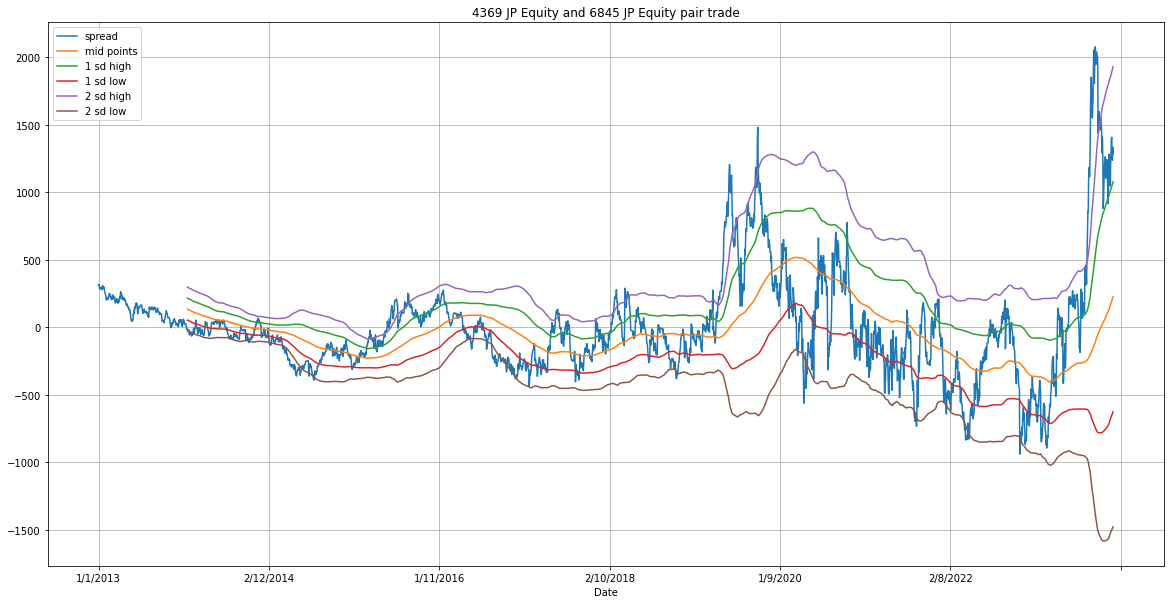

In [193]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
pairsOutcome[f'{pairOne} JP Equity {pairTwo} JP Equity']['spread'].plot(ax=ax1, label='spread', legend=True, grid=True, sharex=True)
pairsOutcome[f'{pairOne} JP Equity {pairTwo} JP Equity']['mid'].plot(ax=ax1, label='mid points', legend=True, grid=True, sharex= True)
pairsOutcome[f'{pairOne} JP Equity {pairTwo} JP Equity']['1sd high'].plot(ax=ax1, label='1 sd high', legend=True, grid=True, sharex= True)
pairsOutcome[f'{pairOne} JP Equity {pairTwo} JP Equity']['1sd low'].plot(ax=ax1, label='1 sd low', legend=True, grid=True, sharex= True)
pairsOutcome[f'{pairOne} JP Equity {pairTwo} JP Equity']['2sd high'].plot(ax=ax1, label='2 sd high', legend=True, grid=True, sharex= True)
pairsOutcome[f'{pairOne} JP Equity {pairTwo} JP Equity']['2sd low'].plot(ax=ax1, label='2 sd low', legend=True, grid=True, sharex= True)
plt.title(f"{pairOne} JP Equity and {pairTwo} JP Equity pair trade")
# df['position'].plot(ax=ax1, label='positions', legend=True, grid=True, style='x')
# df['cumpnl'].plot(ax=ax1, label='Cumulative PNL', legend=True, grid=True, sharex= True)

In [194]:
# df.loc[df['position'] != 0, 'plotposition'] = df['cumpnl']

Text(0.5, 1.0, '4369 JP Equity and 6845 JP Equity pair trade cumulative PNL with trading cost')

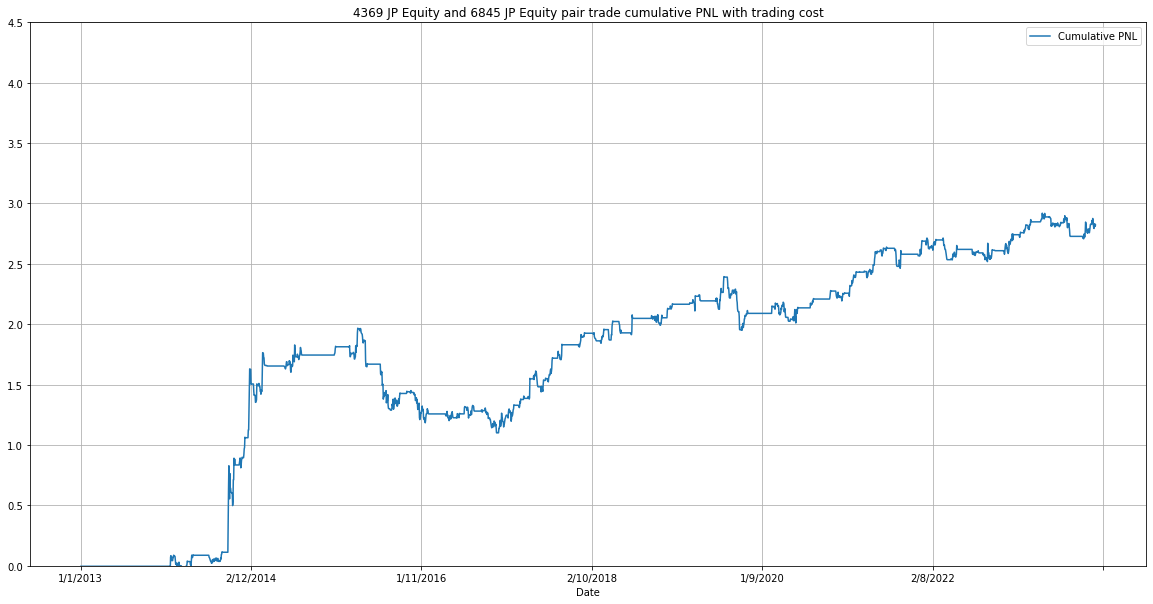

In [195]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
ax1.set_ylim(0, 4.5)
pairsOutcome[f'{pairOne} JP Equity {pairTwo} JP Equity']['cumpnl w/ trading cost'].plot(ax=ax1, label='Cumulative PNL', legend=True, grid=True, sharex= True)
plt.title(f"{pairOne} JP Equity and {pairTwo} JP Equity pair trade cumulative PNL with trading cost")

Text(0.5, 1.0, '4369 JP Equity and 6845 JP Equity pair trade')

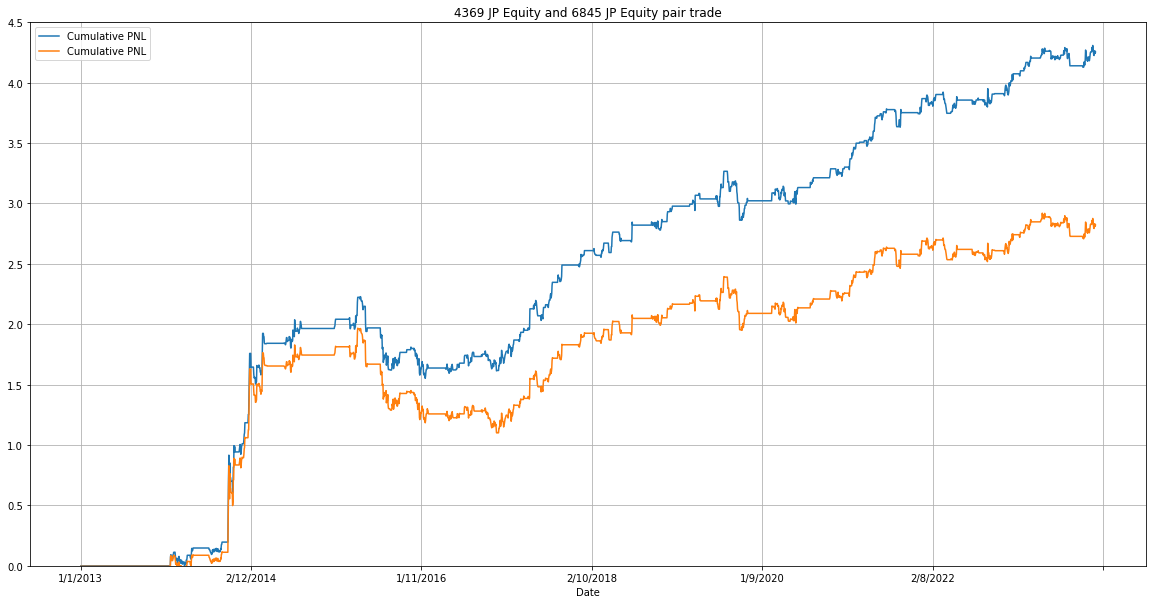

In [196]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
ax1.set_ylim(0, 4.5)
pairsOutcome[f'{pairOne} JP Equity {pairTwo} JP Equity']['cumpnl'].plot(ax=ax1, label='Cumulative PNL', legend=True, grid=True, sharex= True)
pairsOutcome[f'{pairOne} JP Equity {pairTwo} JP Equity']['cumpnl w/ trading cost'].plot(ax=ax1, label='Cumulative PNL', legend=True, grid=True, sharex= True)
plt.title(f"{pairOne} JP Equity and {pairTwo} JP Equity pair trade")

### Ignore the following

In [197]:
import pickle 

with open('saved_result.pkl', 'wb') as f:
    pickle.dump(pairsOutcome, f)

In [198]:
with open('saved_result.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [199]:
loaded_dict['4369 JP Equity 6845 JP Equity'].loc[loaded_dict['4369 JP Equity 6845 JP Equity']['position'] != 0]

,spread,mid,1sd high,1sd low,2sd high,2sd low,position,4369 JP Equity position,6845 JP Equity position,dailypnl,cumpnl,position_changed,commission_cost,bid_ask_spread_cost,slippage_cost,trading_cost,dailypnl w/ trading cost,cumpnl w/ trading cost
Date,,,,,,,,,,,,,,,,,,
1/1/2013,314.162796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0.001,0.003,0.0,0.004,NaN,NaN
2/1/2014,-16.397198,132.952021,214.384682,51.519359,295.817344,-29.913302,1.0,1.0,-1.0,0.000000,0.000000,True,0.001,0.003,0.0,0.004,-0.004000,-0.008000
3/1/2014,-16.397198,131.690342,212.865013,50.515670,294.039685,-30.659002,1.0,1.0,-1.0,-0.022350,-0.022350,False,0.000,0.000,0.0,0.000,-0.022350,-0.030350
6/1/2014,-26.404849,130.390465,211.358498,49.422432,292.326531,-31.545601,1.0,1.0,-1.0,0.102662,0.080311,False,0.000,0.000,0.0,0.000,0.102662,0.072311
7/1/2014,-19.935623,129.225380,210.151763,48.298996,291.078146,-32.627387,1.0,1.0,-1.0,0.011508,0.091819,False,0.000,0.000,0.0,0.000,0.011508,0.083819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27/5/2024,1406.008476,196.055007,1043.564667,-651.454653,1891.074326,-1498.964313,-1.0,-1.0,1.0,0.035229,4.259596,False,0.000,0.000,0.0,0.000,0.035229,2.827596
28/5/2024,1256.485890,203.360468,1051.732930,-645.011994,1900.105392,-1493.384456,-1.0,-1.0,1.0,0.004289,4.263885,False,0.000,0.000,0.0,0.000,0.004289,2.831885
29/5/2024,1236.070305,210.392175,1059.663081,-638.878730,1908.933986,-1488.149636,-1.0,-1.0,1.0,-0.022023,4.241862,False,0.000,0.000,0.0,0.000,-0.022023,2.809862


In [200]:
cumpnlMoreThanOne = []

In [201]:
for x, y in loaded_dict.items():
  if (y.dropna()['cumpnl'][-1] > 1.5):
    cumpnlMoreThanOne.append(x)

/var/folders/b1/x4vbkfvn2qlf297m4zgbkw5h0000gn/T/ipykernel_3048/3636946757.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (y.dropna()['cumpnl'][-1] > 1.5):


In [202]:
len(cumpnlMoreThanOne)

374

In [203]:
totalCumPnl = pd.DataFrame()
totalCumPnl['totalCumPnl'] = loaded_dict[cumpnlMoreThanOne[0]].dropna()['cumpnl']
for x in range(1, len(cumpnlMoreThanOne)):
    totalCumPnl['totalCumPnl'] += loaded_dict[cumpnlMoreThanOne[x]].dropna()['cumpnl']
totalCumPnl

,totalCumPnl
Date,
1/1/2014,0.000000
2/1/2014,0.000000
3/1/2014,1.226138
6/1/2014,1.888256
7/1/2014,1.921194
...,...
24/5/2024,714.442949
27/5/2024,714.575502
28/5/2024,714.752754


In [204]:
totalCumPnl['totalCumPnlwTradingCost'] = loaded_dict[cumpnlMoreThanOne[0]].dropna()['cumpnl w/ trading cost']
for x in range(1, len(cumpnlMoreThanOne)):
    totalCumPnl['totalCumPnlwTradingCost'] += loaded_dict[cumpnlMoreThanOne[x]].dropna()['cumpnl w/ trading cost'] 
totalCumPnl

,totalCumPnl,totalCumPnlwTradingCost
Date,,
1/1/2014,0.000000,-1.496000
2/1/2014,0.000000,-2.128000
3/1/2014,1.226138,-0.921862
6/1/2014,1.888256,-0.263744
7/1/2014,1.921194,-0.354806
...,...,...
24/5/2024,714.442949,267.158949
27/5/2024,714.575502,267.163502
28/5/2024,714.752754,267.200754


Text(0.5, 1.0, 'Top 374 cumulative PNL with trading cost')

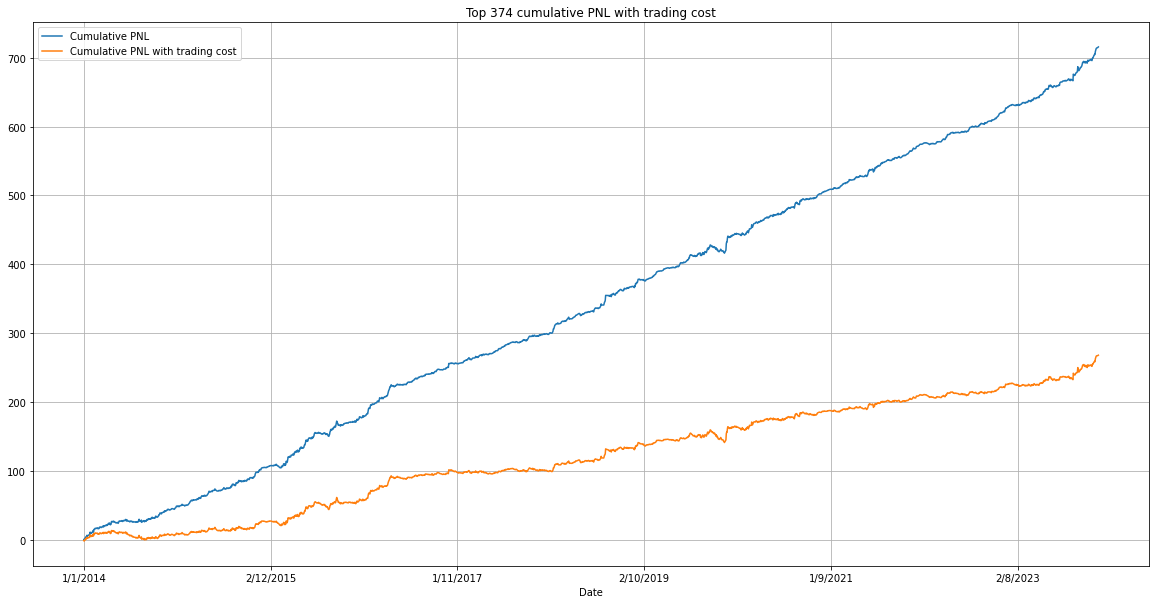

In [205]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
totalCumPnl['totalCumPnl'].plot(ax=ax1, label='Cumulative PNL', legend=True, grid=True, sharex= True)
totalCumPnl['totalCumPnlwTradingCost'].plot(ax=ax1, label='Cumulative PNL with trading cost', legend=True, grid=True, sharex= True)
plt.title(f"Top 374 cumulative PNL with trading cost")

In [206]:
totalPosition = pd.DataFrame()
totalPosition['totalPositions'] = abs(loaded_dict[cumpnlMoreThanOne[0]].dropna()['position'])
for x in range(1, len(cumpnlMoreThanOne)):
    totalPosition['totalPositions'] += abs(loaded_dict[cumpnlMoreThanOne[x]].dropna()['position'])
totalPosition

,totalPositions
Date,
1/1/2014,0.0
2/1/2014,158.0
3/1/2014,161.0
6/1/2014,162.0
7/1/2014,163.0
...,...
24/5/2024,99.0
27/5/2024,97.0
28/5/2024,100.0


In [207]:
totalPosition['totalPositions'].iloc[1:].std() + totalPosition['totalPositions'].iloc[1:].mean()

159.88201031420493

Text(0.5, 1.0, 'Total Daily Positions')

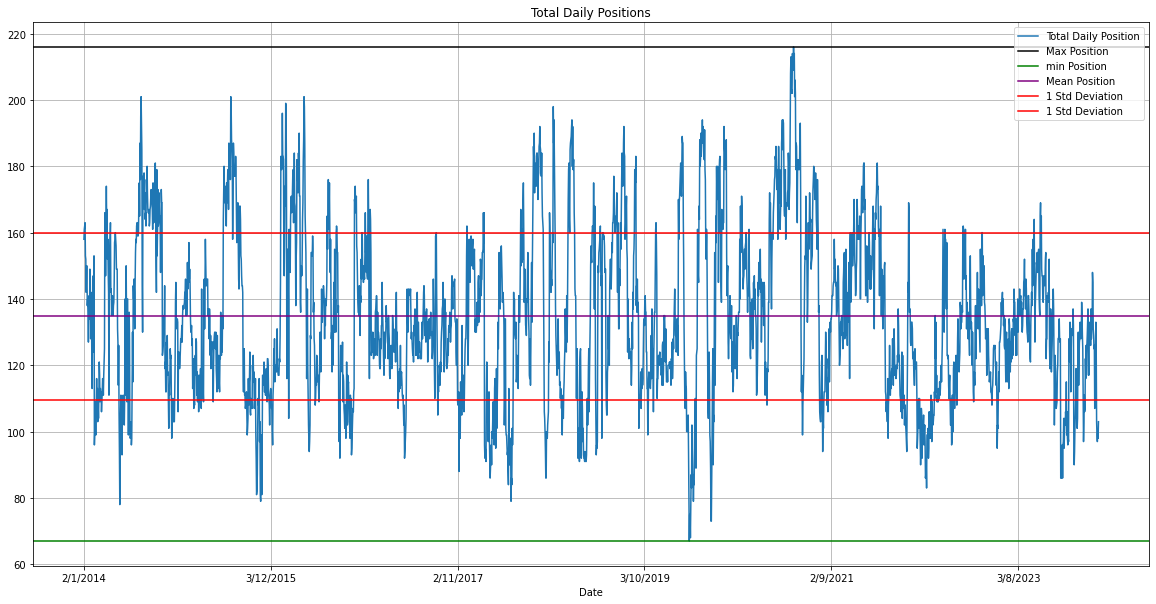

In [208]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
totalPosition['totalPositions'].iloc[1:].plot(ax=ax1, label='Total Daily Position', legend=True, grid=True, sharex= True)
plt.axhline(max(totalPosition['totalPositions'].iloc[1:]), color='black', label='Max Position')
plt.axhline(min(totalPosition['totalPositions'].iloc[1:]), color='g', label='min Position')
plt.axhline(totalPosition['totalPositions'].iloc[1:].mean(), color='purple', label='Mean Position')
plt.axhline(totalPosition['totalPositions'].iloc[1:].std() + totalPosition['totalPositions'].iloc[1:].mean(), label='1 Std Deviation', color='red')
plt.axhline(totalPosition['totalPositions'].iloc[1:].mean() - totalPosition['totalPositions'].iloc[1:].std(), label='1 Std Deviation', color='red')
plt.legend()
plt.title(f"Total Daily Positions")

In [209]:
totalCumPnl_allpairs = pd.DataFrame()
totalCumPnl_allpairs['totalCumPnl'] = loaded_dict[cumpnlMoreThanOne[0]].dropna()['cumpnl']
for x in range(1, len(cumpnlMoreThanOne)):
    totalCumPnl_allpairs['totalCumPnl'] += loaded_dict[cumpnlMoreThanOne[x]].dropna()['cumpnl'] 

In [210]:
totalPosition['gmv'] = totalPosition['totalPositions']*2000000

In [211]:
totalPosition.to_csv("totalPositionGMV.csv")

# Create aggregate daily Pnl with GMV dataframe for all 374 pairs 

In [212]:
GMVData = pd.read_csv('totalPositionGMV.csv', index_col='Date', parse_dates=True)

In [213]:
# Iterate over pairsOutcome to concat dailypnl w/ trading cost for all 374 selected pairs
df_pnl_list = []
for key, df in pairsOutcome.items():
    if key in cumpnlMoreThanOne:
        pnl_df = df[['dailypnl w/ trading cost']].rename(columns={'dailypnl w/ trading cost': key})
        df_pnl_list.append(pnl_df)

# Combine all DataFrames
combined_daily_pnl_df = pd.concat(df_pnl_list, axis=1)

# Drop rows with any NaN values
combined_daily_pnl_df.dropna(inplace=True)

# Add a new column 'aggregate daily pnl' which is the sum of each row
combined_daily_pnl_df['aggregate daily pnl'] = combined_daily_pnl_df.sum(axis=1)

#Inner join daily pnl table with GMV values
combined_daily_pnl_df_with_gmv = pd.merge(combined_daily_pnl_df, GMVData, left_index=True, right_index=True, how='inner')

print(combined_daily_pnl_df_with_gmv.columns)
# Add adjusted pnl (aggregated pnl/gmv)
combined_daily_pnl_df_with_gmv['adjusted aggregate daily pnl']= combined_daily_pnl_df_with_gmv['aggregate daily pnl']/combined_daily_pnl_df_with_gmv['gmv']
print(combined_daily_pnl_df_with_gmv)



Index(['1332 JP Equity 1925 JP Equity', '1514 JP Equity 1802 JP Equity',
       '1514 JP Equity 1808 JP Equity', '1514 JP Equity 2181 JP Equity',
       '1514 JP Equity 2501 JP Equity', '1514 JP Equity 3003 JP Equity',
       '1514 JP Equity 3088 JP Equity', '1514 JP Equity 3231 JP Equity',
       '1514 JP Equity 4204 JP Equity', '1514 JP Equity 4732 JP Equity',
       ...
       '9005 JP Equity 9509 JP Equity', '9005 JP Equity 9616 JP Equity',
       '9005 JP Equity 9861 JP Equity', '9147 JP Equity 9984 JP Equity',
       '9404 JP Equity 9508 JP Equity', '9684 JP Equity 9843 JP Equity',
       '9697 JP Equity 9983 JP Equity', 'aggregate daily pnl',
       'totalPositions', 'gmv'],
      dtype='object', length=377)
           1332 JP Equity 1925 JP Equity  1514 JP Equity 1802 JP Equity  \
Date                                                                      
1/1/2014                        0.000000                       0.000000   
2/1/2014                        0.000000          

/var/folders/b1/x4vbkfvn2qlf297m4zgbkw5h0000gn/T/ipykernel_3048/1616810939.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_daily_pnl_df['aggregate daily pnl'] = combined_daily_pnl_df.sum(axis=1)


In [214]:
def pnlPerformance(pnl, label):
    cumpnl = pnl.cumsum(skipna = True)
    import matplotlib.pyplot as plt
    import numpy as np
    sharpe = pnl.mean()/np.std(pnl)
    sharpe = sharpe*np.sqrt(252)
    print("")
    print ("PERFORMANCE STATISTICS FOR "+label);
    print("Daily annualized sharpe: "+str(sharpe))
    print ("Average annual returns: "+str(pnl.mean()*252*100)+"%")
    print ("Total returns: "+str(pnl.sum()*100)+"%");
    highwatermark_df = cumpnl.cummax();
    drawdown_df = cumpnl - highwatermark_df;
    maxdrawdown = drawdown_df.min();
    print ("Max drawdown: "+str(maxdrawdown*100)+"%");
    fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
    cumpnl.plot(ax=ax1, label='Cumulative PNL with trading cost', legend=True, grid=True, sharex= True)
    plt.title("Cumulative PNL chart with trading cost")
   
    
    print("===========================")
    print("")


PERFORMANCE STATISTICS FOR selected 374 pairs
Daily annualized sharpe: 1.6885112564011977
Average annual returns: 8.451574889911052e-06%
Total returns: 9.1089196035708e-05%
Max drawdown: -7.122356059469105e-06%



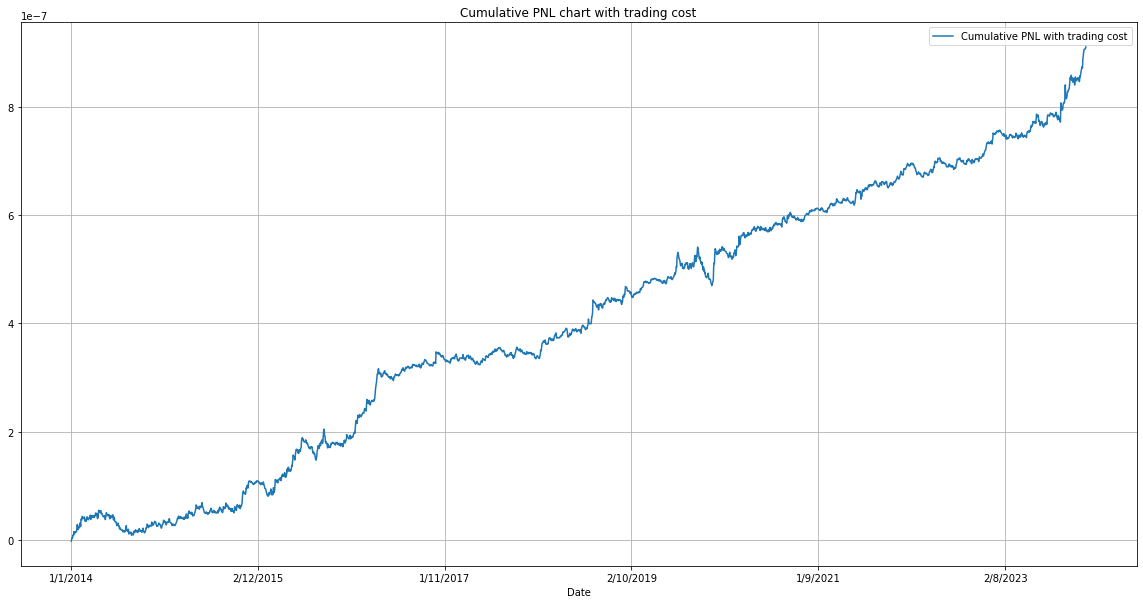

In [215]:
pnlPerformance(combined_daily_pnl_df_with_gmv['adjusted aggregate daily pnl'],"selected 374 pairs")